# Null Hypothesis Significance Testing (NHST)
In the previous section, we discussed the concept of parameter estimates as random variables and then explored the meaning of their sampling distributions. In particular, we examined the *expected value* as a measurement of *bias*, and the *standard error* as a measurments of *uncertainty*. We also saw how we could use both these pieces of information to reach rough descriptive conclusions about how much we can trust our estimates. However, one problem with this approach is that it can appear quite subjective and imprecise. In this section, we will discuss *null hypothesis significance testing* (NHST), which is the most common method used in statistics for reaching more formal conclusions based on this information.

In [4]:
options(repr.plot.width=12, repr.plot.height=7)

## Estimates and Population Values
Remembering that our interest lies in *population* values rather than estimates, a fundamental idea in NHST is to compare our estimate values to some *hypothesised* population values. The aim is to assess how compatible the results of our model are with those hypothesised values. If our results appear compatible, this provides evidence in favour of the hypothesised values, whereas incompatible results provide evidence against the hypothesised values.

### Comparing an Estimate with a Hypothesised Value
To make the idea of comparing an estimate to a hypothesised value clearer, we will focus on a single slope estimate $\hat{\beta}_{1}$. We will then denote our hypothesised population value as $\beta_{1}^{(0)}$. This should makes it clear that we still do not know what value $\beta_{1}$ has, but we are simply taking a guess. We can then calculate

$$
\delta = \hat{\beta}_{1} - \beta_{1}^{(0)}.
$$

The magnitude of $\delta$ tells us how far away our estimate is from our hypothesised population value. Putting aside the issue of deciding what value to choose $\beta_{1}^{(0)}$, we would ideally interpret a *large* $\delta$ as indicating that our hypothesised value *might be wrong*, and a small $\delta$ as indicating that our hypothesised value *might be correct*. 

In order to define what a *large* or *small* value of $\delta$ means, we can appeal to probability. Assuming that $\beta_{1}^{(0)} = \beta_{1}$, we would like to assess whether $\delta$ has a *high probability* or a *low probability*. So, in effect, we want to calculate

$$
P(\delta|\text{Our hypothesis is correct}) = P\left(\delta\middle|\beta_{1}^{(0)} = \beta_{1}\right).
$$

A $\delta$ with a *low* probability suggests we have calculate a difference that is *unlikely*, if our hypothesised value were true. In other words, $\delta$ is *incompatible* with the idea that $\beta_{1}^{(0)} = \beta_{1}$. Similarly, a $\delta$ with a *high* probability suggests we have calculated a difference that is *very likely*, if our hypothesised value were true. This would indicate that $\delta$ is *compatible* with the idea that $\beta_{1}^{(0)} = \beta_{1}$. Notice, however, that these are probability statements about $\delta$, *not* about the hypothesis itself. As such, we cannot conclude anything about how probable our hypothesised value is, only how compatible our data are. This is an important detail that we will return to later.

### The Sampling Distribution of $\delta$
Using probability as our metric for determining the compatibility of our data with the proposed population value seems quite reasonable. This application of probability is appropriate because $\delta$ is a random variable. Because $\delta$ is calculated from $\hat{\beta}_{1}$, the randomness in $\hat{\beta}_{1}$ is *passed down* to $\delta$. Treating $\beta_{1}^{(0)}$ as a constant over different samples, the value of $\delta$ will change due to the fact that $\hat{\beta}_{1}$ will change. As such, $\delta$ has some sampling distribution that we can use to calculate its probability. 

In terms of the expected value of $\delta$, we have[^expectfoot]

$$
E(\delta) = E\left(\hat{\beta}_{1} - \beta_{1}^{(0)}\right) = E\left(\hat{\beta}_{1}\right) - \beta_{1}^{(0)}.
$$

Assuming our estimate is unbiased, we know that $E\left(\hat{\beta}_{1}\right) = \beta_{1}$, meaning that

$$
E(\delta) = \beta_{1} - \beta_{1}^{(0)}.
$$

On average, $\delta$ will therefore be equal to the difference between the true populaton value and our hypothesised value. So, what happens when we are correct? In this situation, $\beta_{1}^{(0)} = \beta_{1}$ and we have

$$
E\left(\delta\middle|\beta_{1}^{(0)} = \beta_{1}\right) = \beta_{1} - \beta_{1}^{(0)} = \beta_{1} - \beta_{1} = 0.
$$

This means that, if our guess is *correct*, the distribution of $\delta$ will be centred on 0. We can confirm this by running simulations in `R`. Here, we run 5,000 simulations of the situation where we are *correct* about the population value in each sample. The resultant distribution of $\delta$ is shown below. The code is hidden, but can be viewed if you want to see more detail about these simulations.

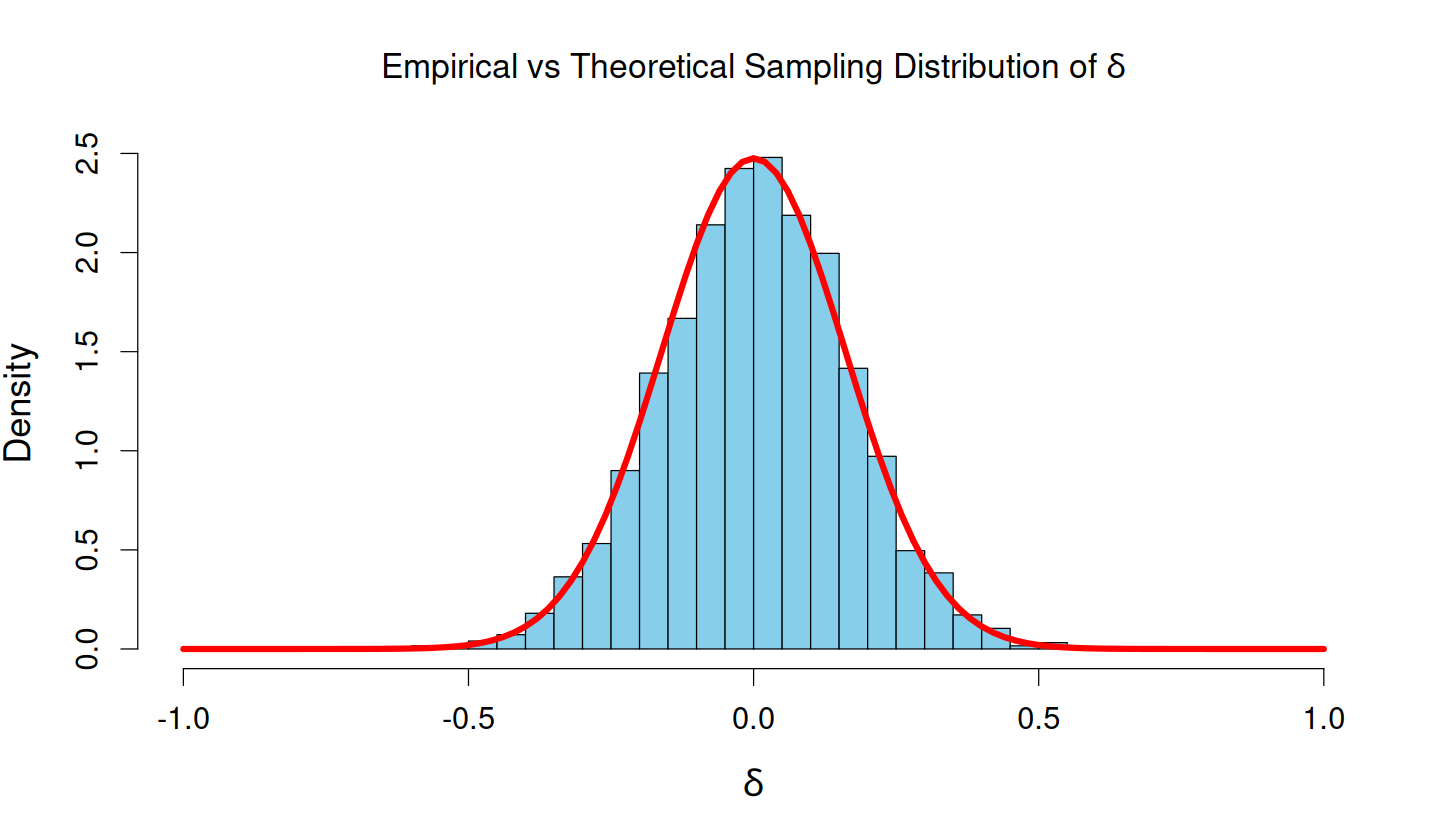

In [5]:
set.seed(666)

beta.0   <- 2
beta.1   <- 3
beta.1.0 <- 3 # Hypothesised value is correct
sigma    <- 5
n        <- 100
n.sims   <- 5000
x        <- runif(n,0,10)
delta    <- rep(0,n.sims)

for (i in 1:n.sims){
    y          <- rnorm(n, mean=beta.0 + beta.1*x, sd=sigma)
    beta.1.hat <- coef(lm(y ~ x))[2]
    delta[i]   <- beta.1.hat - beta.1.0
}

# Compare theoretical and empirical values
th.var  <- sigma^2 / sum((x - mean(x))^2)
th.mean <- 0
em.var  <- var(delta)
em.mean <- mean(delta)

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Plot histogram of theta
hist(delta, probability=TRUE, col="skyblue", xlim=c(-1,1),
    breaks=25, main=expression("Empirical vs Theoretical Sampling Distribution of " * delta),
    xlab=expression(delta))

# Add a normal density curve with the theoretical mean and standard error
curve(dnorm(x, mean=th.mean, sd=sqrt(th.var)), col="red", lwd=5, add=TRUE)

As we can see, this again looks like a normal distribution. In fact, in this situation, all $\delta$ represents is $\hat{\beta}_{1}$ with a constant value subtracted. All this does is change the expected value, meaning that $\delta$ has the same distribution of $\hat{\beta}_{1}$ but with 0 expectation. This is shown on top of the distribution above, illustrating the correspondence between the empirical and theoretical distributions.

Here we can see how the probability statements about $\delta$ play out in terms of its distribution: 

- A *large* $\delta$ corresponds to the tails of the distribution and thus is associated with a *low* probability
- A *small* $\delta$ corresponds to the body of the distribution and thus is associated with a *high* probability 

We would therefore interpret a large $\delta$ as having observed an unusual discrepancy between our estimated parameter and the hypothesised parameter. If this happens, we can say that our data is *incompatible* with the hypothesis that the population value is the same as our proposed value. Similarly, we would interpret a *small* $\delta$ as having observed a discrepancy that is typical of what we would expect across samples. If this happens, we can say that our data is *compatible* with the hypothesis that the population value is the same as our proposed value. So, our question here is really whether the magnitude of $\delta$ is consistent with *sampling error*, or whether it is so large that it suggests that something more systematic is going on. 

```{admonition} The Logic of $\delta$
:class: warning
Before continuing, make sure that the logic of what $\delta$ means, particularly in terms of the relationship with *probability*, is clear to you. This logic is *fundamental* for understanding NHST, so if you are currently confused, spend some time studying the details above until it makes sense.
```

### The Null Hypothesis
Once we have accepted this idea of comparing our parameter estimate to some proposed population value, the next most obvious question is what value to pick? In most experimental situations, there is no clear answer to this. Indeed, it is rare for us to have any idea what singular specific parameter value we are interested in. For instance, when considering a simple regression model, what value of the slope are we interested in? What single value is meaningful to answer our experimental question? Typically, this is a meaningless consideration, as it would be a rare situation where only a single specific value of the slope was interesting, with all slope values, both *smaller* and *larger, being uninteresting. So it appears we have hit a bit of a dead end with this idea.

The core insight provided by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), father of modern statistics, was that we need not focus on ill-defined values of interest. Instead, we can more precisely define what parameter value would indicated *no effect*. If we do so, we can then determine whether the effect we have calculated is *compatible* or *incompatible* with there being no effect in the population. The more incompatible the data is, the more we suspect that the idea of *no effect* is, infact, incorrect. This specification of *no effect* is known as the *null hypothesis*.

As an example, if we had a simple regression model, then the null hypothesis would be that $\beta_{1} = 0$. A slope of 0 is just a horizontal line, indicating no relationship between our predictor and outcome. We will see a similar example later in the units when comparing *group means*, as a mean difference of 0 would indicate that the groups were *identical*. In both cases, our proposed population value is 0. So, in the example used so far, we would specify $\beta_{1}^{(0)} = 0$, meaning that $\delta$ becomes

$$
\delta = \hat{\beta}_{1} - \beta_{1}^{(0)} = \hat{\beta}_{1} - 0 = \hat{\beta}_{1},
$$

which is just the raw parameter estimate. Assuming the null hypothesis of no effect is true (i.e. that $\beta_{1} = 0$), the distribution of $\delta$ remains the same as we saw earlier, as its expected value would be 

$$
E\left(\delta\right) = E\left(\hat{\beta}_{1} - \beta_{1}^{(0)}\right) = E\left(\hat{\beta}_{1}\right) - 0 = \beta_{1} - 0 = 0.
$$

So we could still calculate probabilities using a distribution centred around 0. Our question is then about how far from 0 our slope estimate is, and whether this means it is *compatible* or *incompatible* with the null hypothesis

$$
\mathcal{H}_{0} : \beta_{1} = 0.
$$

Importantly, the proposed population value need not be 0. Although a typical choice, the null hypothesis is not defined by the proposed value being 0 (though this is a common confusion). Instead, it is defined by testing the compatibility of the data with $E\left(\delta|\mathcal{H}_{0}\right) = 0$. So the proposed value is simply *whatever value the parameter would have if the null hypothesis were true*. 

As an example, if our null hypothesis was that there was *no difference* in average IQ between our sample and the general population, we would want to set $\text{IQ}^{(0)} = 100$, not 0. We would then have

$$
\delta = \widehat{\text{IQ}} - \text{IQ}^{(0)} = \widehat{\text{IQ}} - 100.
$$

So $\delta$ now represents how far off our estimated average IQ is from 100. Importantly, under the null hypothesis that $\text{IQ} = 100$, the distribution of $\delta$ is *still centred around 0* because 

$$
E\left(\delta\right) = E\left(\widehat{\text{IQ}} - \text{IQ}^{(0)}\right) = E\left(\widehat{\text{IQ}}\right) - 100 = \text{IQ} - 100 = 0.
$$

The only difference is that the value of $\delta$ is now interpreted as the *discrepancy from 100*, rather than the *discrepancy from 0*. The proposed value simply provides our *baseline* for comparison, which then becomes 0 when we perform the subtraction. We can see this flexibility in the `R` function for a one-sample $t$-test, as it takes the form

```R
t.test(y, mu=some_alternative_value)
```

So here we can choose any value we like for the comparison. Using `mu=0` is fairly meaningless in the example of IQ, but using `mu=100` produces a legitimate and meaningfull null hypothesis.

```{admonition} Null Comparisons in Software
:class: tip
Although the example above highlighted how we can, in principle, specify any null value we like, we do not always have this level of control in software. Although the `t.test()` function does allow this, within the context of a linear model, we will always automatically get comparisons that use an implicit proposed value of 0. For regression slopes, this is fine because a slope of 0 indicates *no relationship* and thus is sensible. However, for the intercept, the test is asking whether $\beta_{0} = 0$. In other words, could the population slope be a regression through the origin? For many problems, this is not a very sensible or meaningful question and thus the test on the intercept is largely ignored. This highlights the importance of considering what *questions* tests are asking when they are produced automatically.
```

## Test Statistics
We have no reached a point where most of the logic of NHST has been established. To review, we begin by determining what value our parameter of interest would have under the null hypothesis of no effect. We can then compare that value to the actual value we have calculated. Using the theoretical sampling distribution of this difference, we can establish the probability of that value having occurred *if* the null hypothesis were true. The smaller this probability is, the less compatible our data is with the proposed null value. If the probability gets small enough, we can take this as evidence *against* the null hypothesis.

Although we have yet to define precisely how to use probability in the method above, we first need to discuss some practical limitations of calculating probability directly from the distribution of $\delta$. To begin with, ...

...

For all these reasons, we typically transform $\delta$ into a standardised value known as a *test statistic*.


### The $z$-statistic
Dividing a normal random variable by a constant simply *scales* that random variable and so the shape of the distribution does not change, only the units.

### The $t$-statistic
In the previous section, we saw that the standard error of the sampling distribution of $\hat{\beta}_{1}$ depends upon $\sigma^{2}$. However, in practise, we do not known $\sigma^{2}$. Instead, we have an estimate derived from the residuals $\hat{\sigma}^{2}$. So how does that change things? We can plug-in our estimate like so

$$
\widehat{\text{Var}}\left(\hat{\beta}_{1}\right) = \frac{\hat{\sigma}^{2}}{(n-1)s^{2}_{x}}
$$

and we have a value for the variance from which we can take the square-root to give the standard error. However, what we have done here is replaced a *constant* ($\sigma^{2}$) with a *random variable* ($\hat{\sigma}^{2}$). This means we have introduced randomness into this calculation. In other words, the standard error will change with each sample. In fact, what we have created is an *estimate* of the variance of $\hat{\beta}_{1}$. So, we now have an estimate of the variance of an estimate. This means that the denominator of our test statistic is no longer a constant that simple scales the distribution. Rather, we are now dividing a *random variable* by *another random variable*.

This estimation of the SE actually has a direct consequence for using the sampling distribution of $\delta$ for inference, because this is based on assuming that the standard error is known. However, in small samples, our estimate will be too imprecise for this to be accurate. As the sample size grows, our estimate of the SE will get better and using it as an approximation for the true value will make less practical difference. So this adds another reason for using a $t$-statistic over the sampling distribution of the raw estimate: the $t$-statistic automatically takes the uncertainty in the estimation of the SE into account by changing its shape.

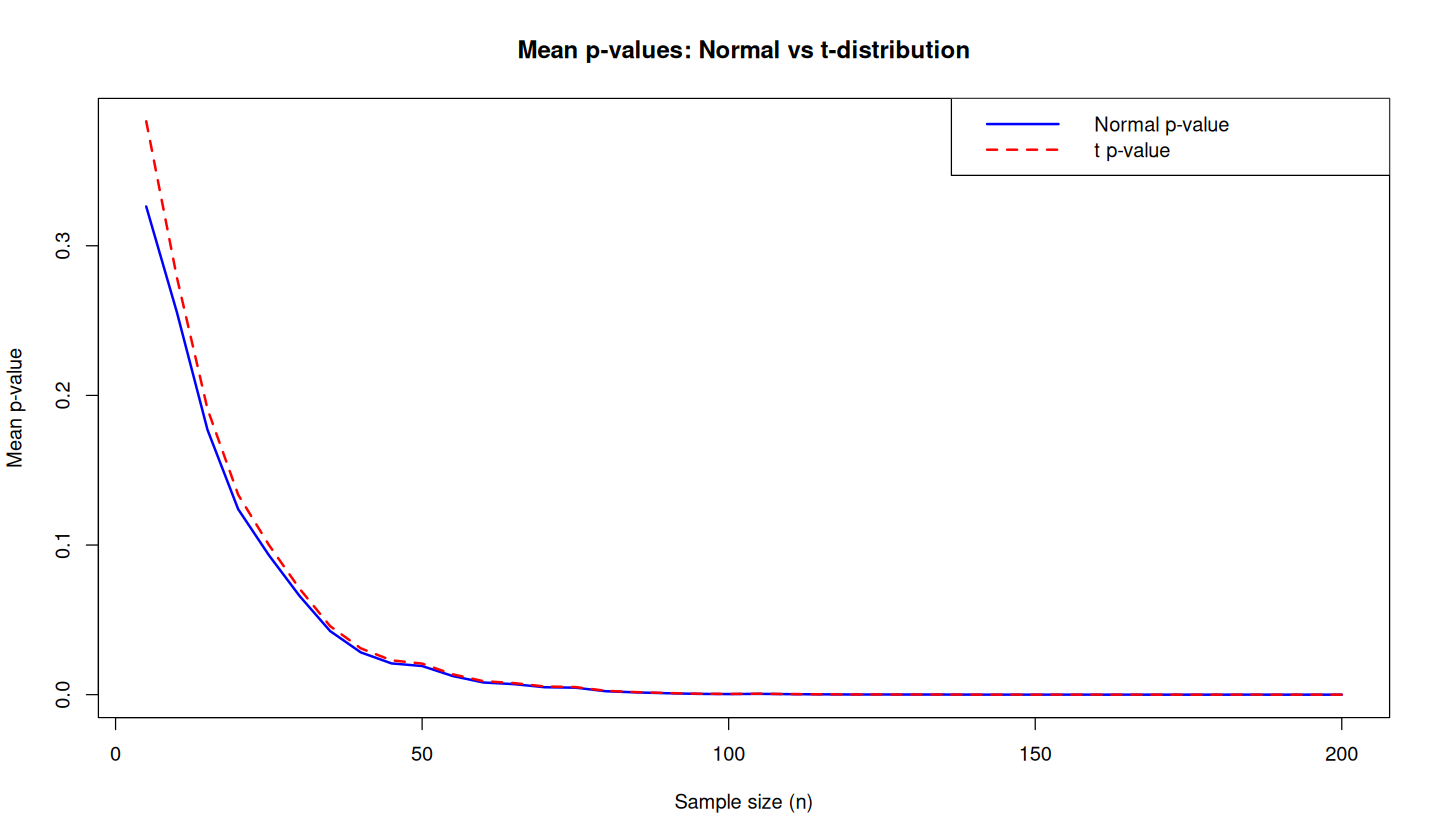

In [4]:
set.seed(123)

# Parameters
beta_0 <- 0
beta_1 <- 0.5
sigma <- 1
n_vals <- seq(5, 200, by = 5)
n_reps <- 1000

# Store results
p_norm_mat <- numeric(length(n_vals))
p_t_mat    <- numeric(length(n_vals))

for (j in seq_along(n_vals)) {
  n <- n_vals[j]
  p_norms <- numeric(n_reps)
  p_ts    <- numeric(n_reps)
  
  for (i in 1:n_reps) {
    x <- rnorm(n)
    y <- beta_0 + beta_1 * x + rnorm(n, sd = sigma)
    
    fit <- lm(y ~ x)
    est <- coef(fit)["x"]
    se  <- summary(fit)$coefficients["x", "Std. Error"]
    df  <- df.residual(fit)
    
    # P-value using normal distribution (directly from sampling distribution of estimate)
    p_norms[i] <- 2 * pnorm(abs(est), mean = 0, sd = se, lower.tail = FALSE)
    
    # P-value using t-distribution
    t_stat <- est / se
    p_ts[i] <- 2 * pt(abs(t_stat), df = df, lower.tail = FALSE)
  }
  
  # Save mean p-values for this sample size
  p_norm_mat[j] <- mean(p_norms)
  p_t_mat[j]    <- mean(p_ts)
}

# Plotting with base R
plot(n_vals, p_norm_mat, type = "l", lwd = 2, col = "blue",
     ylim = range(c(p_norm_mat, p_t_mat)), xlab = "Sample size (n)",
     ylab = "Mean p-value", main = "Mean p-values: Normal vs t-distribution")
lines(n_vals, p_t_mat, lwd = 2, col = "red", lty = 2)
legend("topright", legend = c("Normal p-value", "t p-value"),
       col = c("blue", "red"), lty = c(1, 2), lwd = 2)



So what happens when you divide one random variable by another? You end up with a distribution that changes shape dynamically. ... For the $t$-distribution, the dynamic reshaping of the distribution depends upon the distribution's *degrees of freedom*, which are directly informed by the sampling distribution of the standard error. So, rather than having a fixed shape like a standard normal distribution, the $t$-distribution can grow fatter or thinner, depending upon the properties of the denominator. This is illustrated below. 

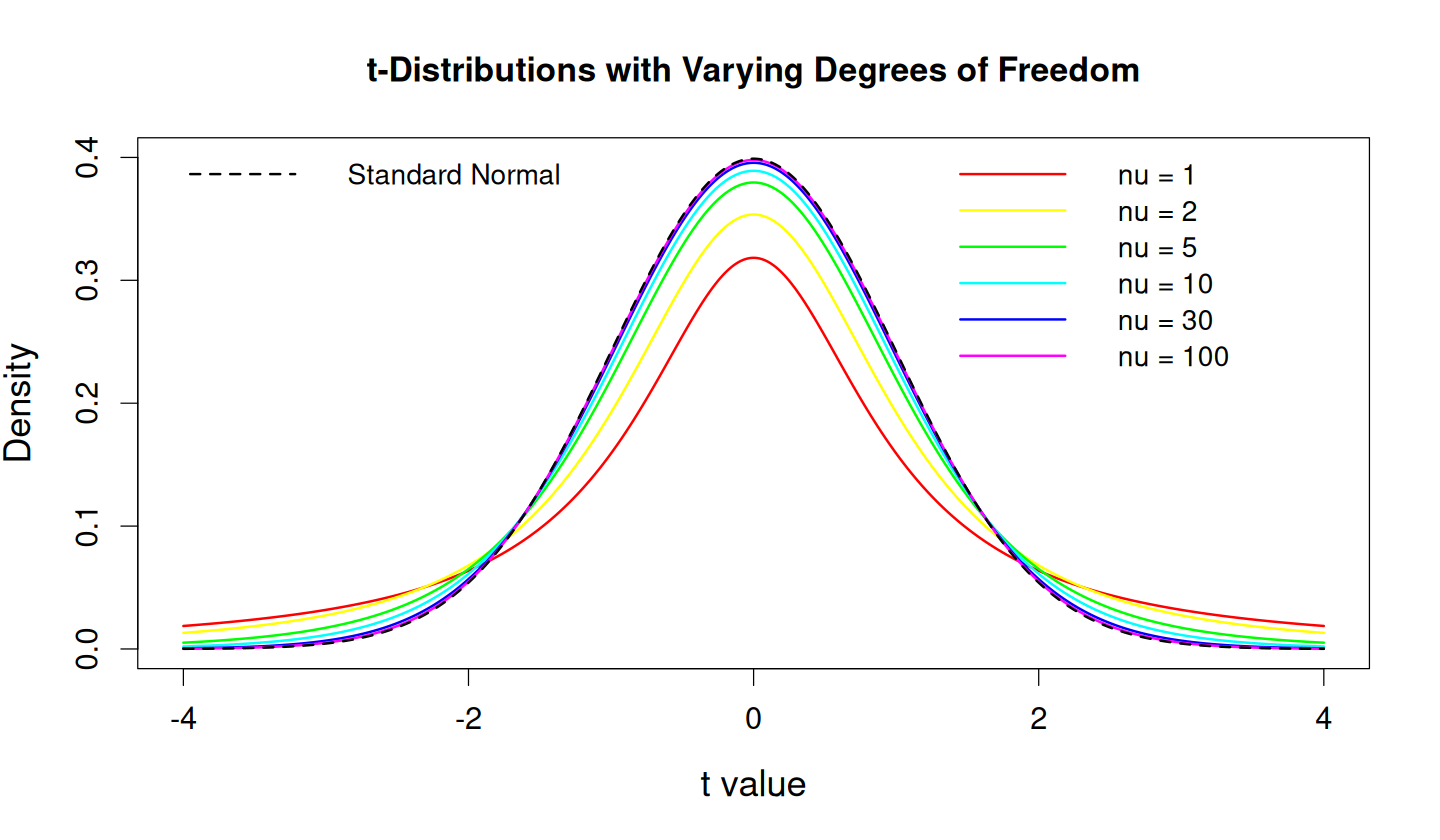

In [5]:


# Set up the x-axis range
x <- seq(-4, 4, length.out = 500)

# Define degrees of freedom to compare
dfs <- c(1, 2, 5, 10, 30, 100)

par(cex.lab=1.3, cex.axis=1.1, cex=1.4) # plot scaling

# Set up plot
plot(x, dt(x, df = 1), type = "n", ylim = c(0, 0.4),
     xlab = "t value", ylab = "Density",
     main = "t-Distributions with Varying Degrees of Freedom")

# Define a color palette
colors <- rainbow(length(dfs))

# Add lines for each t-distribution
for (i in seq_along(dfs)) {
  lines(x, dt(x, df = dfs[i]), col = colors[i], lwd = 2)
}

# Add standard normal distribution for reference
lines(x, dnorm(x), col = "black", lwd = 2, lty = 2)

# Add legend
legend("topright", legend = paste("nu =", dfs),
       col = colors, lwd = 2, bty = "n")

legend("topleft", legend = "Standard Normal", col = "black", lty = 2, lwd = 2, bty = "n")



An important result here is that as $n \rightarrow \infty$, the $t$-distribution converges on the normal distribution. This is because the scaling introduced by the degrees of freedom becomes so large that it has basically no effect. If we therefore wanted to ignore the fact that $\hat{\sigma}^{2}$ was an estimate, we could say that our test statistic is *asymptotically* normally distributed. In other words, as $n$ approaches infinity, this is correct. Of course, this is only sensible mathematically, as we will never have an *infinite* sample size. However, for practical purposes, this just means that the *larger* the sample size, the more we can trust this simplification. As we can see above, when $\nu > 100$ the $t$-distribution becomes practically indistinguishable from the standard normal distribution. Although this may seem unnecessary, later in the course we will be exmaining mixed-effects models where the concepts of degrees of freedom can break-down. In this situation, one option is to rely on test statistics that do not depend upon the degrees of freedom and just assume an asymptotically correct distribution.


## The $p$-value

This level is referred to as $\alpha$.

Fisher vs Neyman-Pearson

Fisher actually viewed $p$-values as continuous evidence against the null, rather than as a threshold value for declaring significance. In fact, although the criterion of 0.05 is attributed to Fisher, it is insightful to see what he *actually* said about it:

```{epigraph}
The value for which $p = 0.05$, or 1 in 20, is convenient to use in practice if we want to draw a line beyond which we say that the deviation is significant, but it must not be forgotten that we shall often draw such a line when there is nothing there but chance.

-- Ronald Fisher
```

So, Fisher viewed this criterion as a convenient heuristic, but fully acknowledged its limitations and did not ever state that we should *reject* the null hypothesis when $p < 0.05$. Indeed, Fisher strongly disagreed with the Neyman-Pearson concept of rejecting or failing to reject the null

```{epigraph}
It is a mistake to speak of the null hypothesis as though it were a thing we are testing, or as though we were trying to accept or reject it.

-- Ronald Fisher
```

Indeed, in Fisher's conceptualising a small $p$-value simply means that the data are surpring under the null, whereas a large $p$-value means that the data are not surprising under the null. Smaller $p$-values present more evidence against the null, but only so far as we make the logical leap of saying that very suprising data make it less likely that the null is correct. However, we would not *reject* the null, because it still remains possible that the null is correct. All we are saying is that the data we have are less compatible with the null. Nothing more.

## Confidence Intervals

What we were actually looking at here were 68% confidence intervals.

Notice that this depends upon assuming normality.

## NHST in `R`

In [6]:
data(mtcars)

mod <- lm(mpg ~ wt + hp + disp, data=mtcars)
summary(mod)


Call:
lm(formula = mpg ~ wt + hp + disp, data = mtcars)

Residuals:
   Min     1Q Median     3Q    Max 
-3.891 -1.640 -0.172  1.061  5.861 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 37.105505   2.110815  17.579  < 2e-16 ***
wt          -3.800891   1.066191  -3.565  0.00133 ** 
hp          -0.031157   0.011436  -2.724  0.01097 *  
disp        -0.000937   0.010350  -0.091  0.92851    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.639 on 28 degrees of freedom
Multiple R-squared:  0.8268,	Adjusted R-squared:  0.8083 
F-statistic: 44.57 on 3 and 28 DF,  p-value: 8.65e-11


We can also produce confidence intervals using the `confint()` function

In [7]:
print(confint(mod, level=0.95))

                  2.5 %       97.5 %
(Intercept) 32.78169625 41.429314293
wt          -5.98488310 -1.616898063
hp          -0.05458171 -0.007731388
disp        -0.02213750  0.020263482


Notably, other confidence interval levels can be produced. For instance, the intervals we used previous of $\pm 1 \times \text{SE}$ correspond to an approximate 68% CI, as shown below.

In [8]:
print(confint(mod, level=0.68))

                   16 %         84 %
(Intercept) 34.96844420 39.242566342
wt          -4.88033821 -2.721442954
hp          -0.04273454 -0.019578564
disp        -0.01141544  0.009541424


Note, however, that we do not need to prescribe to the theory of CIs in order to interpret our parameters in terms of $\pm 1 \times \text{SE}$ or $\pm 2 \times \text{SE}$ or whatever we want. The interpretation remains valid. The part that theory of CIs adds is the *probabilistic* information about the interval. So, the 68% part or the 95% part. These percentages are only valid under the assumptions of CIs. So we can interpret any interval around the estimates we like, however, we need to make further assumptions in order to make any probabilistic claims about the interval's behaviour over reapeated sampling.

However, it is not very typical to do this as 95% CIs are considered the standard due to their compatibility with $\alpha = 0.05$.

[^expectfoot]: The reason why the expectation disappears from $\beta_{1}^{(0)}$ is because our hypothesised value is *not* a random variable, it is a *constant*. In other words, it is a single number that will not change if we repeat the same experiment over and over again. As such, its average value across samples is just its original value. This is a basic result of using the expectation operator with a constant $c$, giving $E(c) = c$. 